In [1]:
# Imports 
import os
import sys
sys.path.append("..")
os.environ["pyna_language"] = 'python'
import pdb
import numpy as np
import openmdao.api as om
import pandas as pd
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
%matplotlib inline
from pyNA.pyna import pyna
from scipy.interpolate import RegularGridInterpolator

from IPython.display import clear_output
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# Inputs 
z_cb_lst = np.hstack((np.linspace(25, 250, 10), np.linspace(300, 750, 10)))

TS_cb_lst = dict()
TS_cb_lst['stca']= dict()
TS_cb_lst['stca']['V2'] = np.linspace(0.75, 1.0, 11)
TS_cb_lst['stca']['Vmax'] = np.linspace(0.4, 1.0, 25)
TS_cb_lst['a10'] = dict()
TS_cb_lst['a10']['V2'] = np.linspace(0.775, 1.0, 10)
TS_cb_lst['a10']['Vmax'] = np.linspace(0.675, 1.0, 14)

Vmax_lst = dict()
Vmax_lst['stca'] = dict()
Vmax_lst['stca']['V2'] = 197*0.51444444
Vmax_lst['stca']['Vmax'] = 250*0.51444444
Vmax_lst['a10'] = dict()
Vmax_lst['a10']['V2'] = 234.4*0.51444444
Vmax_lst['a10']['Vmax'] = 250*0.51444444

> <ipython-input-26-0f4cb537fddd>(13)<module>()
-> for j,TS in enumerate([TS_cb_lst[ac_name][case][0]]):
(Pdb) data['X [m]'][np.where(data['Z [m]'] > 10.7)[0][0]]
1739.6848670209672
(Pdb) c
> <ipython-input-26-0f4cb537fddd>(13)<module>()
-> for j,TS in enumerate([TS_cb_lst[ac_name][case][0]]):
(Pdb) data['X [m]'][np.where(data['Z [m]'] > 10.7)[0][0]]
1733.7931867498944
(Pdb) c
> <ipython-input-26-0f4cb537fddd>(13)<module>()
-> for j,TS in enumerate([TS_cb_lst[ac_name][case][0]]):
(Pdb) data['X [m]'][np.where(data['Z [m]'] > 10.7)[0][0]]
1733.5280974782875
(Pdb) c
> <ipython-input-26-0f4cb537fddd>(13)<module>()
-> for j,TS in enumerate([TS_cb_lst[ac_name][case][0]]):
(Pdb) data['X [m]'][np.where(data['Z [m]'] > 10.7)[0][0]]
1732.5679357579004
(Pdb) c
> <ipython-input-26-0f4cb537fddd>(13)<module>()
-> for j,TS in enumerate([TS_cb_lst[ac_name][case][0]]):
(Pdb) data['X [m]'][np.where(data['Z [m]'] > 10.7)[0][0]]
3789.85741572645
(Pdb) c
> <ipython-input-26-0f4cb537fddd>(13)<module>()
-> f

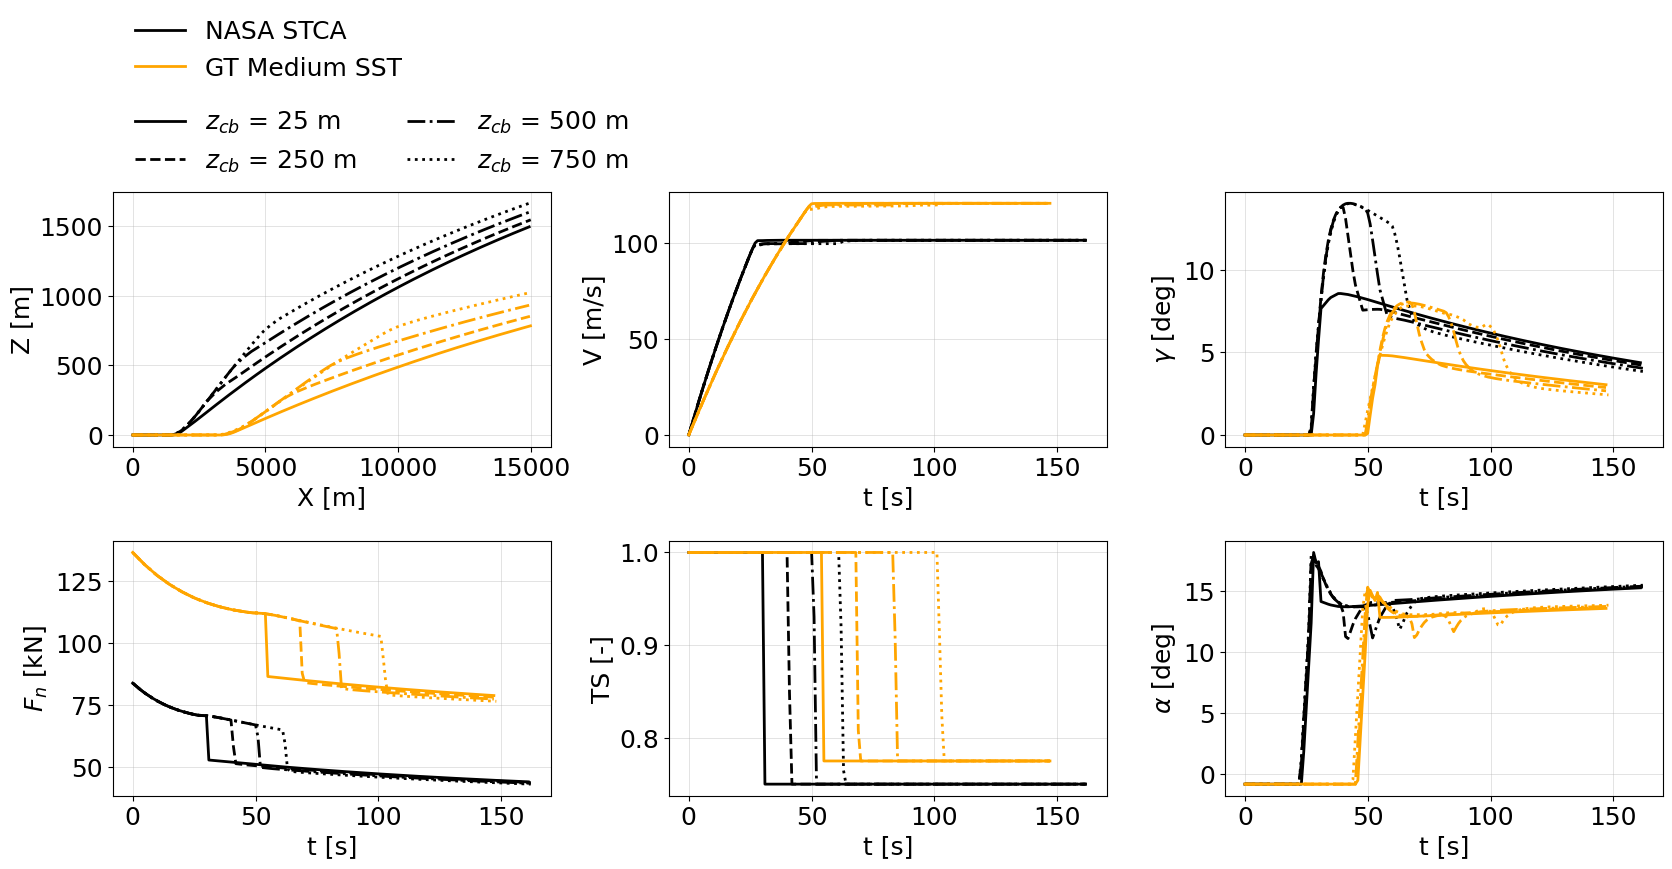

In [26]:
# Plot trajectories 
fig, ax = plt.subplots(2, 3, figsize=(20,8))
plt.style.use('../utils/plot.mplstyle')

for ac_name in ['stca', 'a10']:

    case = 'V2'

    pyna_settings = pyna.load_settings(case_name=ac_name)
    pyna_settings.ac_name = ac_name

    for i, z_cb in enumerate([25., 250., 500., 750.]):
        for j,TS in enumerate([TS_cb_lst[ac_name][case][0]]):

            if ac_name == 'stca':
                rnd = 2
                color = 'k'
                label='NASA STCA'
            elif ac_name == 'a10':
                rnd = 3
                color='orange'
                label='GT Medium SST'
            
            pyna_settings.output_file_name = pyna_settings.ac_name + '_' + str(np.round(z_cb, rnd)) + '_' + str(np.round(TS, rnd)) + '.sql'
            pyna_settings.engine_file_name = 'engine_' + pyna_settings.ac_name + '_' + str(np.round(z_cb, rnd)) + '_' + str(np.round(TS, rnd)) + '.csv'
            pyna_settings.trajectory_file_name = 'trajectory_' + pyna_settings.ac_name + '_' + str(np.round(z_cb, rnd)) + '_' + str(np.round(TS, rnd)) + '.csv'

            data = pd.read_csv('../cases/'+ac_name+'/trajectory/STCB/'+case+'/'+pyna_settings.trajectory_file_name)
            
            if z_cb == 25:
                linestyle = '-'
                label_v = '$z_{cb}$ = 25 m'
            if z_cb == 250:
                linestyle = '--'
                label_v = '$z_{cb}$ = 250 m'
            if z_cb == 500:
                linestyle = '-.'
                label_v = '$z_{cb}$ = 500 m'
            if z_cb == 750:
                linestyle = ':'
                label_v = '$z_{cb}$ = 750 m'
            
            if z_cb == 25.:
                ax[0, 0].plot(data['X [m]'], data['Z [m]'], linestyle=linestyle, color=color, label=label)
            else:
                ax[0, 0].plot(data['X [m]'], data['Z [m]'], linestyle=linestyle, color=color)

            if ac_name == 'stca':
                ax[0, 1].plot(data['t_source [s]'], data['V [m/s]'], linestyle, color=color, label=label_v)
            else:
                ax[0, 1].plot(data['t_source [s]'], data['V [m/s]'], linestyle, color=color)
            ax[0, 2].plot(data['t_source [s]'], data['gamma [deg]'], linestyle, color=color)
            ax[1, 0].plot(data['t_source [s]'], data['F_n [N]']/1000., linestyle, color=color)
            ax[1, 1].plot(data['t_source [s]'], data['TS [-]'], linestyle, color=color)
            ax[1, 2].plot(data['t_source [s]'], data['alpha [deg]'], linestyle, color=color)

#             print(data['F_n [N]'][0])

            pdb.set_trace()

ax[0, 0].set_xlabel('X [m]')
ax[0, 1].set_xlabel('t [s]')
ax[0, 2].set_xlabel('t [s]')
ax[1, 0].set_xlabel('t [s]')
ax[1, 1].set_xlabel('t [s]')
ax[1, 2].set_xlabel('t [s]')

ax[0, 0].set_ylabel('Z [m]')
ax[0, 1].set_ylabel('V [m/s]')
ax[0, 2].set_ylabel(r'$\gamma$ [deg]')
ax[1, 0].set_ylabel(r'$F_n$ [kN]')
ax[1, 1].set_ylabel('TS [-]')
ax[1, 2].set_ylabel(r'$\alpha$ [deg]')

ax[0,0].legend(loc='lower left', bbox_to_anchor=(0, 1.35), ncol=1, frameon=False)
ax[0,1].legend(loc='lower left', bbox_to_anchor=(-1.27, 0.98), ncol=2, frameon=False)
plt.subplots_adjust(hspace=0.37, wspace=0.27)


In [213]:
# Load sweeps
stcb_sweeps = dict()
stcb_sweeps_nolat = dict() 

ac_lst = ['stca', 'a10']
case_lst = ['V2', 'Vmax']

n_sl = 121
x_observer_lst = np.zeros((n_sl+1, 3))
x_observer_lst[:-1, 0] = np.linspace(0, 6500, n_sl)
x_observer_lst[:-1, 1] = 450*np.ones(n_sl)
x_observer_lst[:, 2] = 4*0.3048*np.ones(n_sl+1)
x_observer_lst[-1,0] = 6500.

for ac_name in ac_lst:
    
    stcb_sweeps[ac_name] = dict()
    stcb_sweeps_nolat[ac_name] = dict()
    
    for case in case_lst:

        # Load STCB sweeps
        stcb_sweeps[ac_name][case] = dict()
        stcb_sweeps[ac_name][case]['sideline'] = np.load('../cases/'+ac_name+'/output/STCB/' + case + '/sweeps/epnl_sideline.npy') 
        stcb_sweeps[ac_name][case]['flyover']  = np.load('../cases/'+ac_name+'/output/STCB/' + case + '/sweeps/epnl_flyover.npy') 

        # Load STCB sweeps
        stcb_sweeps_nolat[ac_name][case] = dict()
        stcb_sweeps_nolat[ac_name][case]['sideline'] = np.load('../cases/'+ac_name+'/output/STCB/' + case + '/sweeps/epnl_sideline_no_lateral_attenuation.npy') 
        stcb_sweeps_nolat[ac_name][case]['flyover']  = np.load('../cases/'+ac_name+'/output/STCB/' + case + '/sweeps/epnl_flyover_no_lateral_attenuation.npy') 


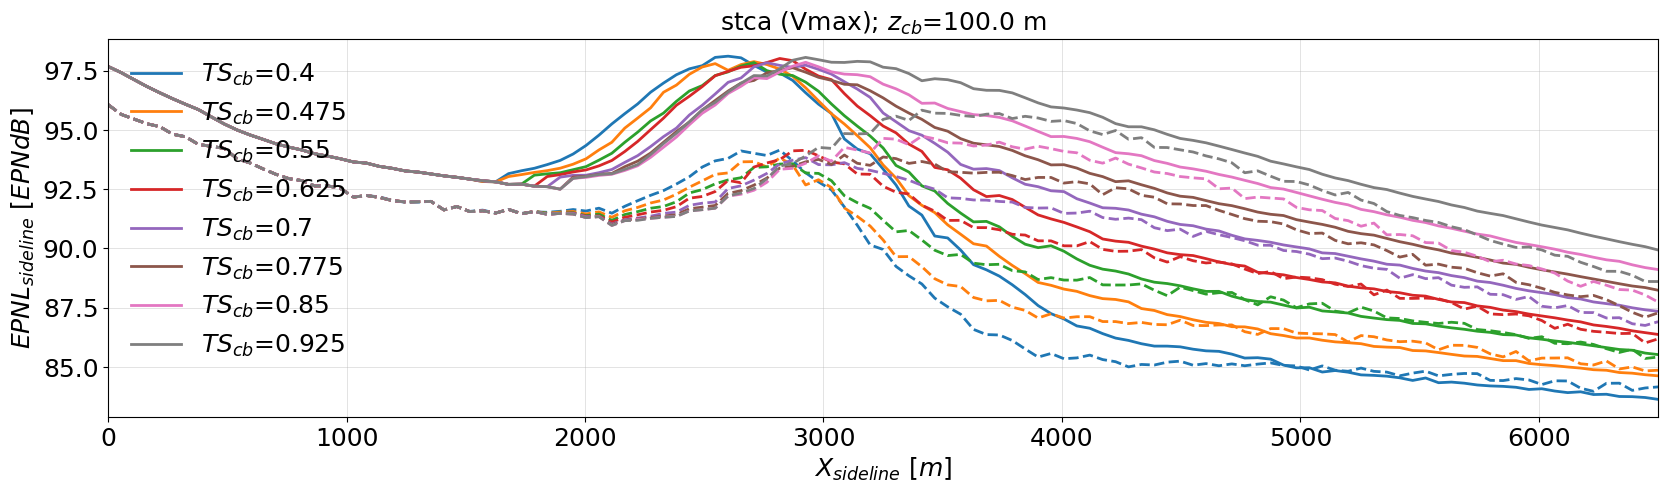

In [247]:
ac_name = 'stca'
case = 'Vmax'
epnl = stcb_sweeps[ac_name][case]['sideline']

fig, ax = plt.subplots(1,1,figsize=(20, 5))

colors=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
idx_zcb = 3
for i, TS_cb in enumerate(TS_cb_lst[ac_name][case][0:-1:3]):

    idx = np.where(TS_cb_lst[ac_name][case] == TS_cb)[0][0]
    
    ax.plot(x_observer_lst[:-1,0], stcb_sweeps_nolat[ac_name][case]['sideline'][idx_zcb, idx, :], color=colors[i], label='$TS_{cb}$='+str(np.round(TS_cb, 3)))
    ax.plot(x_observer_lst[:-1,0], stcb_sweeps[ac_name][case]['sideline'][idx_zcb, idx, :], '--', color=colors[i])

if ac_name == 'stca' and case == 'V2':
    ax.plot([2196.39946553, 2196.39946553], [88, 100], 'k')
    ax.annotate(xy=(2170, 89), s=r'$\rightarrow z>25m$', fontsize=18, ha='left')
    ax.set_ylim([88, 100])
elif ac_name == 'a10' and case == 'V2':
    ax.plot([4178.71947204, 4178.71947204], [92, 102], 'k')
    ax.annotate(xy=(4150, 89), s=r'$\rightarrow z>25m$', fontsize=18, ha='left')
    ax.set_ylim([92, 102])
    
ax.set_ylabel('$EPNL_{sideline}\ [EPNdB]$')
ax.set_xlabel('$X_{sideline}\ [m]$')
ax.set_xlim([0, 6500])

ax.legend(frameon=False, loc='upper left')
if case == 'V2':
    ax.set_title(ac_name + ' (' + case + ' + 20 kts); ' + '$z_{cb}$='+str(z_cb_lst[idx_zcb])+' m')
elif case == 'Vmax':
    ax.set_title(ac_name + ' (' + case + '); ' + '$z_{cb}$='+str(z_cb_lst[idx_zcb])+' m')

In [233]:
ac_name = 'stca'
case = 'Vmax'

z_cb = 25.0

results = dict()
for TS in [0.8, 0.85, 0.9, 0.95]:
    py.settings.case_name = ac_name
    py.settings.ac_name = ac_name
    py.settings.output_directory_name = 'STCB/'+case
    py.settings.output_file_name = py.settings.ac_name + '_' + str(np.round(z_cb, 3)) + '_' + str(np.round(TS, 3)) + '.sql'

    results[TS] = py.load_results(py.settings.output_file_name)

(-10.0, 50.0)

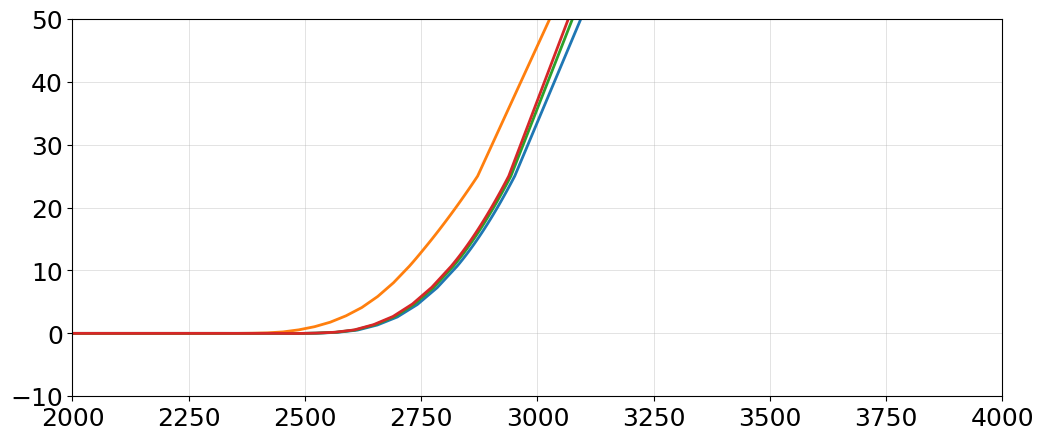

In [235]:
for TS in [0.8, 0.85, 0.9, 0.95]:
    plt.plot(results[TS].get_val('trajectory.x'), results[TS].get_val('trajectory.z'))
    
plt.xlim([2000, 4000])
plt.ylim([-10, 50])